In [2]:
!pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 1.5 MB/s eta 0:00:0000:0100:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 7.4 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.7/75.7 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 11.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 10.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 10.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 11.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 10.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 M

In [3]:
!pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.8/24.8 MB 10.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.1/38.1 MB 10.8 MB/s eta 0:00:0000:0100:01


In [4]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

2023-03-06 01:20:05.200425: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-06 01:20:05.892984: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-03-06 01:20:05.893113: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-03-06 01:20:05.893120: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [6]:
features = pd.read_pickle("feat_backpack.pickle")

In [10]:
features.head()

,main_bg_tokens,main_consistent_bg_token,main_fg_tokens,main_consistent_fg_token,second_bg_tokens,second_consistent_bg_token,second_fg_tokens,second_consistent_fg_token,layer_11_act,layer_10_act,layer_09_act,class,labels
0,"[{'max_image': 156, 'max_obj': 156, 'min_obj':...",92.0,"[{'max_image': 156, 'max_obj': 72, 'min_obj': ...",72.0,"[{'max_image': 156, 'max_obj': 156, 'min_obj':...",92.0,"[{'max_image': 156, 'max_obj': 178, 'min_obj':...",178.0,"[[3.9636064, -3.344161, 0.018599555, -0.680718...","[[2.3967972, -2.2439294, -1.6943444, -0.963295...","[[2.3873458, -1.3841065, -1.6437932, -0.918038...",backpack,0
1,"[{'max_image': 170, 'max_obj': 170, 'min_obj':...",170.0,"[{'max_image': 170, 'max_obj': 42, 'min_obj': ...",70.0,"[{'max_image': 170, 'max_obj': 170, 'min_obj':...",170.0,"[{'max_image': 170, 'max_obj': 60, 'min_obj': ...",60.0,"[[3.0557942, -4.3884687, -1.9317892, 0.5815902...","[[1.7552422, -3.0687892, -1.209787, 1.9393528,...","[[1.880189, -1.7407998, -0.83776057, 0.3473085...",backpack,0
2,"[{'max_image': 19, 'max_obj': 19, 'min_obj': 3...",148.0,"[{'max_image': 19, 'max_obj': 86, 'min_obj': 1...",86.0,"[{'max_image': 19, 'max_obj': 19, 'min_obj': 3...",148.0,None,NaN,"[[3.288642, -1.9042169, -5.040059, 0.023156375...","[[1.6052028, -1.816736, -2.782751, 0.22806424,...","[[1.2008154, -1.0786269, -1.777029, -0.4010378...",backpack,0
3,"[{'max_image': 173, 'max_obj': 173, 'min_obj':...",173.0,"[{'max_image': 173, 'max_obj': 19, 'min_obj': ...",120.0,"[{'max_image': 173, 'max_obj': 173, 'min_obj':...",173.0,"[{'max_image': 173, 'max_obj': 116, 'min_obj':...",145.0,"[[1.2662159, 2.6536717, -3.1891391, -0.4909477...","[[0.400926, -0.2360898, -0.8044621, 2.2384477,...","[[0.017914236, 1.346952, -0.32394043, 2.601256...",backpack,0
4,"[{'max_image': 10, 'max_obj': 10, 'min_obj': 5...",161.0,"[{'max_image': 10, 'max_obj': 105, 'min_obj': ...",119.0,"[{'max_image': 10, 'max_obj': 10, 'min_obj': 5...",161.0,None,NaN,"[[2.6675725, 0.20362961, -0.97527635, -1.24362...","[[-0.36094376, -1.458556, 0.8186226, -1.900530...","[[-0.158916, -0.69183946, 2.1854048, -2.364840...",backpack,0


In [8]:
labels = ['backpack', 'umbrella', 'handbag', 'tie', 'suitcase']
# (1, 27) ('person', 'backpack'): 3524
# (1, 28) ('person', 'umbrella'): 2089
# (1, 31) ('person', 'handbag'): 4890
# (1, 32) ('person', 'tie'): 1543
# (1, 33) ('person', 'suitcase'): 1048
labels_to_idx = dict(zip(labels, range(len(labels))))
labels_to_idx

{'backpack': 0, 'umbrella': 1, 'handbag': 2, 'tie': 3, 'suitcase': 4}

In [9]:
features["labels"] = features['class'].apply(lambda x: labels_to_idx[x])

In [17]:
len(features)

1001

In [30]:
features = features[(~features["second_fg_tokens"].isnull()) & (~features["main_fg_tokens"].isnull())]
features = features.reset_index(drop=True)
len(features)

608

In [31]:
token_strategy = 'max_obj'
layer = 0

In [37]:
token = features["main_fg_tokens"][0][layer][token_strategy]
x = features["layer_11_act"][0][token,:]
print(x.shape)
y = to_categorical(features["labels"].values.tolist())
print(y.shape)

(768,)
(608, 1)


In [34]:
x = np.zeros((len(features),768))
print(x.shape)
for idx, row in features.iterrows():
    token = row["main_fg_tokens"][layer][token_strategy]
    x[idx] = row["layer_09_act"][token,:]

(608, 768)


In [35]:
x.shape

(608, 768)

In [48]:
def base_model():
    clf_model = Sequential()
    clf_model.add(Dense(256, input_dim=768, activation='relu'))
    clf_model.add(Dropout(0.5))
    clf_model.add(Dense(5))
    clf_model.add(Activation("softmax"))

#     sgd = SGD(lr=0.001)
    adam = Adam()
    clf_model.compile(loss="categorical_crossentropy", optimizer=adam, metrics=["accuracy"])
    return clf_model

In [72]:
files = ["feat_backpack.pickle", "feat_handbag.pickle", "feat_suitcase.pickle", "feat_tie.pickle", "feat_umbrella.pickle"]
token_strategies = ["consistent", 'max_image', 'max_obj', 'min_obj', 'random_obj']
# layer_strategy = 0
layers_map = {0: '09', 1: '10', 2: '11'}
layers = [0, 1, 2]
objects = ['main', 'second']
          
histories = {}
test_scores = {}

histories = {}
test_scores = {}
for obj in objects:
    for strategy in token_strategies:
        for layer in layers:
            x = np.zeros((5000,768))
            y = np.zeros((5000,1))
            samples_i = 0

            for file in files:
                print(f"Processing file '{file}'")
                features = pd.read_pickle(file)
                features = features[(~features["second_fg_tokens"].isnull()) & 
                                    (~features["main_fg_tokens"].isnull()) & 
                                    (~features["second_consistent_fg_token"].isnull()) &
                                    (~features["main_consistent_fg_token"].isnull())]
                features["labels"] = features['class'].apply(lambda x: labels_to_idx[x])
                features = features.reset_index(drop=True)
                for idx, row in tqdm(features.iterrows()):
                    if strategy == 'consistent':
                        token = int(row[f"{obj}_consistent_fg_token"])
                    else:
                        token = int(row[f"{obj}_fg_tokens"][layer][strategy])

                    x[samples_i] = row[f"layer_{layers_map[layer]}_act"][token,:]
                    y[samples_i] = row["labels"]
                    samples_i += 1    

            x = x[:samples_i,:]
            y = y[:samples_i,:]
            y = to_categorical(y)

            train_data, test_data, train_labels, test_labels = train_test_split(x, y, test_size=0.10, 
                                                                                random_state=42, 
                                                                                shuffle=True)    
            clf_model = base_model()
            print("Training model...")
            hist = clf_model.fit(tf.stack(train_data), 
                                 tf.stack(train_labels), 
                                 validation_split=0.10,
                                 epochs=20, 
                                 batch_size=128, 
                                 verbose=0)
            histories[f"{layer}-{obj}-{strategy}"] = hist
            print("Evaluating model...")
            test_scores[f"{layer}-{obj}-{strategy}"] = clf_model.evaluate(tf.stack(test_data), tf.stack(test_labels), batch_size=len(test_data))
            print("Done...")

Processing file 'feat_backpack.pickle'


608it [00:00, 22168.55it/s]


Processing file 'feat_handbag.pickle'


554it [00:00, 11785.04it/s]


Processing file 'feat_suitcase.pickle'


735it [00:00, 22090.00it/s]


Processing file 'feat_tie.pickle'


354it [00:00, 11448.18it/s]


Processing file 'feat_umbrella.pickle'


718it [00:00, 22901.22it/s]


Training model...
Evaluating model...
1/1 [==============================] - 0s 17ms/step - loss: 2.1762 - accuracy: 0.3333
Done...
Processing file 'feat_backpack.pickle'


608it [00:00, 11928.57it/s]


Processing file 'feat_handbag.pickle'


554it [00:00, 11709.38it/s]


Processing file 'feat_suitcase.pickle'


735it [00:00, 12328.44it/s]


Processing file 'feat_tie.pickle'


354it [00:00, 17070.40it/s]


Processing file 'feat_umbrella.pickle'


718it [00:00, 12511.42it/s]


Training model...
Evaluating model...
1/1 [==============================] - 0s 16ms/step - loss: 2.1244 - accuracy: 0.3737
Done...
Processing file 'feat_backpack.pickle'


608it [00:00, 11909.57it/s]


Processing file 'feat_handbag.pickle'


554it [00:00, 11551.86it/s]


Processing file 'feat_suitcase.pickle'


735it [00:00, 12274.40it/s]


Processing file 'feat_tie.pickle'


354it [00:00, 19100.83it/s]


Processing file 'feat_umbrella.pickle'


718it [00:00, 12516.98it/s]


Training model...
Evaluating model...
1/1 [==============================] - 0s 15ms/step - loss: 1.9758 - accuracy: 0.4680
Done...
Processing file 'feat_backpack.pickle'


608it [00:00, 20893.17it/s]


Processing file 'feat_handbag.pickle'


554it [00:00, 11671.44it/s]


Processing file 'feat_suitcase.pickle'


735it [00:00, 11612.01it/s]


Processing file 'feat_tie.pickle'


354it [00:00, 10735.88it/s]


Processing file 'feat_umbrella.pickle'


718it [00:00, 16081.72it/s]


Training model...
Evaluating model...
1/1 [==============================] - 0s 15ms/step - loss: 2.1936 - accuracy: 0.3401
Done...
Processing file 'feat_backpack.pickle'


608it [00:00, 13383.38it/s]


Processing file 'feat_handbag.pickle'


554it [00:00, 11953.95it/s]


Processing file 'feat_suitcase.pickle'


735it [00:00, 12081.27it/s]


Processing file 'feat_tie.pickle'


354it [00:00, 11382.80it/s]


Processing file 'feat_umbrella.pickle'


718it [00:00, 12436.14it/s]


Training model...
Evaluating model...
1/1 [==============================] - 0s 17ms/step - loss: 1.9889 - accuracy: 0.3973
Done...
Processing file 'feat_backpack.pickle'


608it [00:00, 19669.85it/s]


Processing file 'feat_handbag.pickle'


554it [00:00, 11957.89it/s]


Processing file 'feat_suitcase.pickle'


735it [00:00, 11880.14it/s]


Processing file 'feat_tie.pickle'


354it [00:00, 11366.24it/s]


Processing file 'feat_umbrella.pickle'


718it [00:00, 22548.50it/s]


Training model...
Evaluating model...
1/1 [==============================] - 0s 17ms/step - loss: 1.7879 - accuracy: 0.4848
Done...
Processing file 'feat_backpack.pickle'


608it [00:00, 11298.59it/s]


Processing file 'feat_handbag.pickle'


554it [00:00, 14568.58it/s]


Processing file 'feat_suitcase.pickle'


735it [00:00, 21969.57it/s]


Processing file 'feat_tie.pickle'


354it [00:00, 10782.12it/s]


Processing file 'feat_umbrella.pickle'


718it [00:00, 21788.28it/s]


Training model...
Evaluating model...
1/1 [==============================] - 0s 16ms/step - loss: 2.1659 - accuracy: 0.3603
Done...
Processing file 'feat_backpack.pickle'


608it [00:00, 20187.59it/s]


Processing file 'feat_handbag.pickle'


554it [00:00, 21029.41it/s]


Processing file 'feat_suitcase.pickle'


735it [00:00, 11326.88it/s]


Processing file 'feat_tie.pickle'


354it [00:00, 10708.17it/s]


Processing file 'feat_umbrella.pickle'


718it [00:00, 11963.07it/s]


Training model...
Evaluating model...
1/1 [==============================] - 0s 17ms/step - loss: 2.1599 - accuracy: 0.3906
Done...
Processing file 'feat_backpack.pickle'


608it [00:00, 20527.71it/s]


Processing file 'feat_handbag.pickle'


554it [00:00, 21404.44it/s]


Processing file 'feat_suitcase.pickle'


735it [00:00, 21851.06it/s]


Processing file 'feat_tie.pickle'


354it [00:00, 18678.17it/s]


Processing file 'feat_umbrella.pickle'


718it [00:00, 11972.82it/s]


Training model...
Evaluating model...
1/1 [==============================] - 0s 16ms/step - loss: 1.9010 - accuracy: 0.4242
Done...
Processing file 'feat_backpack.pickle'


608it [00:00, 21010.22it/s]


Processing file 'feat_handbag.pickle'


554it [00:00, 21194.75it/s]


Processing file 'feat_suitcase.pickle'


735it [00:00, 11782.79it/s]


Processing file 'feat_tie.pickle'


354it [00:00, 11394.94it/s]


Processing file 'feat_umbrella.pickle'


718it [00:00, 12047.44it/s]


Training model...
Evaluating model...
1/1 [==============================] - 0s 19ms/step - loss: 2.1623 - accuracy: 0.3131
Done...
Processing file 'feat_backpack.pickle'


608it [00:00, 11549.74it/s]


Processing file 'feat_handbag.pickle'


554it [00:00, 10657.70it/s]


Processing file 'feat_suitcase.pickle'


735it [00:00, 12080.94it/s]


Processing file 'feat_tie.pickle'


354it [00:00, 11475.35it/s]


Processing file 'feat_umbrella.pickle'


718it [00:00, 11907.86it/s]


Training model...
Evaluating model...
1/1 [==============================] - 0s 16ms/step - loss: 1.9636 - accuracy: 0.4040
Done...
Processing file 'feat_backpack.pickle'


608it [00:00, 11914.80it/s]


Processing file 'feat_handbag.pickle'


554it [00:00, 11150.46it/s]


Processing file 'feat_suitcase.pickle'


735it [00:00, 12161.38it/s]


Processing file 'feat_tie.pickle'


354it [00:00, 11283.75it/s]


Processing file 'feat_umbrella.pickle'


718it [00:00, 11761.37it/s]


Training model...
Evaluating model...
1/1 [==============================] - 0s 16ms/step - loss: 1.9843 - accuracy: 0.4680
Done...
Processing file 'feat_backpack.pickle'


608it [00:00, 11408.37it/s]


Processing file 'feat_handbag.pickle'


554it [00:00, 21287.96it/s]


Processing file 'feat_suitcase.pickle'


735it [00:00, 11749.02it/s]


Processing file 'feat_tie.pickle'


354it [00:00, 11030.84it/s]


Processing file 'feat_umbrella.pickle'


718it [00:00, 23522.46it/s]


Training model...
Evaluating model...
1/1 [==============================] - 0s 15ms/step - loss: 1.8905 - accuracy: 0.4175
Done...
Processing file 'feat_backpack.pickle'


608it [00:00, 11697.18it/s]


Processing file 'feat_handbag.pickle'


554it [00:00, 19280.80it/s]


Processing file 'feat_suitcase.pickle'


735it [00:00, 12082.50it/s]


Processing file 'feat_tie.pickle'


354it [00:00, 11065.86it/s]


Processing file 'feat_umbrella.pickle'


718it [00:00, 12374.76it/s]


Training model...
Evaluating model...
1/1 [==============================] - 0s 16ms/step - loss: 1.8935 - accuracy: 0.4613
Done...
Processing file 'feat_backpack.pickle'


608it [00:00, 11332.98it/s]


Processing file 'feat_handbag.pickle'


554it [00:00, 12099.73it/s]


Processing file 'feat_suitcase.pickle'


735it [00:00, 12069.49it/s]


Processing file 'feat_tie.pickle'


354it [00:00, 19783.40it/s]


Processing file 'feat_umbrella.pickle'


718it [00:00, 12262.25it/s]


Training model...
Evaluating model...
1/1 [==============================] - 0s 15ms/step - loss: 2.1056 - accuracy: 0.4747
Done...
Processing file 'feat_backpack.pickle'


608it [00:00, 11658.73it/s]


Processing file 'feat_handbag.pickle'


554it [00:00, 11812.42it/s]


Processing file 'feat_suitcase.pickle'


735it [00:00, 12330.81it/s]


Processing file 'feat_tie.pickle'


354it [00:00, 11361.46it/s]


Processing file 'feat_umbrella.pickle'


718it [00:00, 23913.59it/s]


Training model...
Evaluating model...
1/1 [==============================] - 0s 15ms/step - loss: 1.4415 - accuracy: 0.5758
Done...
Processing file 'feat_backpack.pickle'


608it [00:00, 11962.98it/s]


Processing file 'feat_handbag.pickle'


554it [00:00, 12088.46it/s]


Processing file 'feat_suitcase.pickle'


735it [00:00, 12328.15it/s]


Processing file 'feat_tie.pickle'


354it [00:00, 11484.58it/s]


Processing file 'feat_umbrella.pickle'


718it [00:00, 23823.17it/s]


Training model...
Evaluating model...
1/1 [==============================] - 0s 16ms/step - loss: 1.4556 - accuracy: 0.6162
Done...
Processing file 'feat_backpack.pickle'


608it [00:00, 11951.43it/s]


Processing file 'feat_handbag.pickle'


554it [00:00, 12093.62it/s]


Processing file 'feat_suitcase.pickle'


735it [00:00, 12176.08it/s]


Processing file 'feat_tie.pickle'


354it [00:00, 11184.14it/s]


Processing file 'feat_umbrella.pickle'


718it [00:00, 23262.27it/s]


Training model...
Evaluating model...
1/1 [==============================] - 0s 15ms/step - loss: 1.4719 - accuracy: 0.6229
Done...
Processing file 'feat_backpack.pickle'


608it [00:00, 22035.04it/s]


Processing file 'feat_handbag.pickle'


554it [00:00, 13453.87it/s]


Processing file 'feat_suitcase.pickle'


735it [00:00, 12009.96it/s]


Processing file 'feat_tie.pickle'


354it [00:00, 11489.55it/s]


Processing file 'feat_umbrella.pickle'


718it [00:00, 12368.87it/s]


Training model...
Evaluating model...
1/1 [==============================] - 0s 15ms/step - loss: 2.0382 - accuracy: 0.3569
Done...
Processing file 'feat_backpack.pickle'


608it [00:00, 12042.69it/s]


Processing file 'feat_handbag.pickle'


554it [00:00, 12098.66it/s]


Processing file 'feat_suitcase.pickle'


735it [00:00, 22948.36it/s]


Processing file 'feat_tie.pickle'


354it [00:00, 20315.85it/s]


Processing file 'feat_umbrella.pickle'


718it [00:00, 11908.57it/s]


Training model...
Evaluating model...
1/1 [==============================] - 0s 16ms/step - loss: 2.0082 - accuracy: 0.3906
Done...
Processing file 'feat_backpack.pickle'


608it [00:00, 11588.74it/s]


Processing file 'feat_handbag.pickle'


554it [00:00, 12075.65it/s]


Processing file 'feat_suitcase.pickle'


735it [00:00, 22560.09it/s]


Processing file 'feat_tie.pickle'


354it [00:00, 10915.68it/s]


Processing file 'feat_umbrella.pickle'


718it [00:00, 12367.85it/s]


Training model...
Evaluating model...
1/1 [==============================] - 0s 17ms/step - loss: 1.7094 - accuracy: 0.5051
Done...
Processing file 'feat_backpack.pickle'


608it [00:00, 11778.38it/s]


Processing file 'feat_handbag.pickle'


554it [00:00, 11924.01it/s]


Processing file 'feat_suitcase.pickle'


735it [00:00, 12105.42it/s]


Processing file 'feat_tie.pickle'


354it [00:00, 11438.39it/s]


Processing file 'feat_umbrella.pickle'


718it [00:00, 12353.44it/s]


Training model...
Evaluating model...
1/1 [==============================] - 0s 16ms/step - loss: 1.3489 - accuracy: 0.6061
Done...
Processing file 'feat_backpack.pickle'


608it [00:00, 11786.54it/s]


Processing file 'feat_handbag.pickle'


554it [00:00, 12072.70it/s]


Processing file 'feat_suitcase.pickle'


735it [00:00, 22874.46it/s]


Processing file 'feat_tie.pickle'


354it [00:00, 14278.69it/s]


Processing file 'feat_umbrella.pickle'


718it [00:00, 12236.69it/s]


Training model...
Evaluating model...
1/1 [==============================] - 0s 16ms/step - loss: 1.4717 - accuracy: 0.6566
Done...
Processing file 'feat_backpack.pickle'


608it [00:00, 11939.29it/s]


Processing file 'feat_handbag.pickle'


554it [00:00, 22567.10it/s]


Processing file 'feat_suitcase.pickle'


735it [00:00, 22767.02it/s]


Processing file 'feat_tie.pickle'


354it [00:00, 11602.23it/s]


Processing file 'feat_umbrella.pickle'


718it [00:00, 12340.74it/s]


Training model...
Evaluating model...
1/1 [==============================] - 0s 15ms/step - loss: 1.5076 - accuracy: 0.6162
Done...
Processing file 'feat_backpack.pickle'


608it [00:00, 12015.74it/s]


Processing file 'feat_handbag.pickle'


554it [00:00, 23039.46it/s]


Processing file 'feat_suitcase.pickle'


735it [00:00, 20405.31it/s]


Processing file 'feat_tie.pickle'


354it [00:00, 11571.12it/s]


Processing file 'feat_umbrella.pickle'


718it [00:00, 15156.45it/s]


Training model...
Evaluating model...
1/1 [==============================] - 0s 17ms/step - loss: 1.4274 - accuracy: 0.5993
Done...
Processing file 'feat_backpack.pickle'


608it [00:00, 11974.27it/s]


Processing file 'feat_handbag.pickle'


554it [00:00, 12207.35it/s]


Processing file 'feat_suitcase.pickle'


735it [00:00, 12133.24it/s]


Processing file 'feat_tie.pickle'


354it [00:00, 11563.19it/s]


Processing file 'feat_umbrella.pickle'


718it [00:00, 15925.41it/s]


Training model...
Evaluating model...
1/1 [==============================] - 0s 15ms/step - loss: 1.4382 - accuracy: 0.6094
Done...
Processing file 'feat_backpack.pickle'


608it [00:00, 12027.64it/s]


Processing file 'feat_handbag.pickle'


554it [00:00, 12101.94it/s]


Processing file 'feat_suitcase.pickle'


735it [00:00, 12334.95it/s]


Processing file 'feat_tie.pickle'


354it [00:00, 11636.60it/s]


Processing file 'feat_umbrella.pickle'


718it [00:00, 23974.32it/s]


Training model...
Evaluating model...
1/1 [==============================] - 0s 15ms/step - loss: 1.3902 - accuracy: 0.6364
Done...
Processing file 'feat_backpack.pickle'


608it [00:00, 12006.12it/s]


Processing file 'feat_handbag.pickle'


554it [00:00, 11784.62it/s]


Processing file 'feat_suitcase.pickle'


735it [00:00, 22893.31it/s]


Processing file 'feat_tie.pickle'


354it [00:00, 11316.17it/s]


Processing file 'feat_umbrella.pickle'


718it [00:00, 12217.18it/s]


Training model...
Evaluating model...
1/1 [==============================] - 0s 15ms/step - loss: 1.4290 - accuracy: 0.6229
Done...
Processing file 'feat_backpack.pickle'


608it [00:00, 11965.96it/s]


Processing file 'feat_handbag.pickle'


554it [00:00, 11959.42it/s]


Processing file 'feat_suitcase.pickle'


735it [00:00, 16009.71it/s]


Processing file 'feat_tie.pickle'


354it [00:00, 11179.42it/s]


Processing file 'feat_umbrella.pickle'


718it [00:00, 12397.13it/s]


Training model...
Evaluating model...
1/1 [==============================] - 0s 15ms/step - loss: 1.5751 - accuracy: 0.6532
Done...
Processing file 'feat_backpack.pickle'


608it [00:00, 18062.63it/s]


Processing file 'feat_handbag.pickle'


554it [00:00, 12092.24it/s]


Processing file 'feat_suitcase.pickle'


735it [00:00, 12234.65it/s]


Processing file 'feat_tie.pickle'


354it [00:00, 11345.31it/s]


Processing file 'feat_umbrella.pickle'


718it [00:00, 12407.60it/s]


Training model...
Evaluating model...
1/1 [==============================] - 0s 15ms/step - loss: 1.6094 - accuracy: 0.6263
Done...


In [70]:
token 

72.0

0-max_image
1-max_image
2-max_image
0-max_obj
1-max_obj
2-max_obj
0-min_obj
1-min_obj
2-min_obj
0-random_obj
1-random_obj
2-random_obj


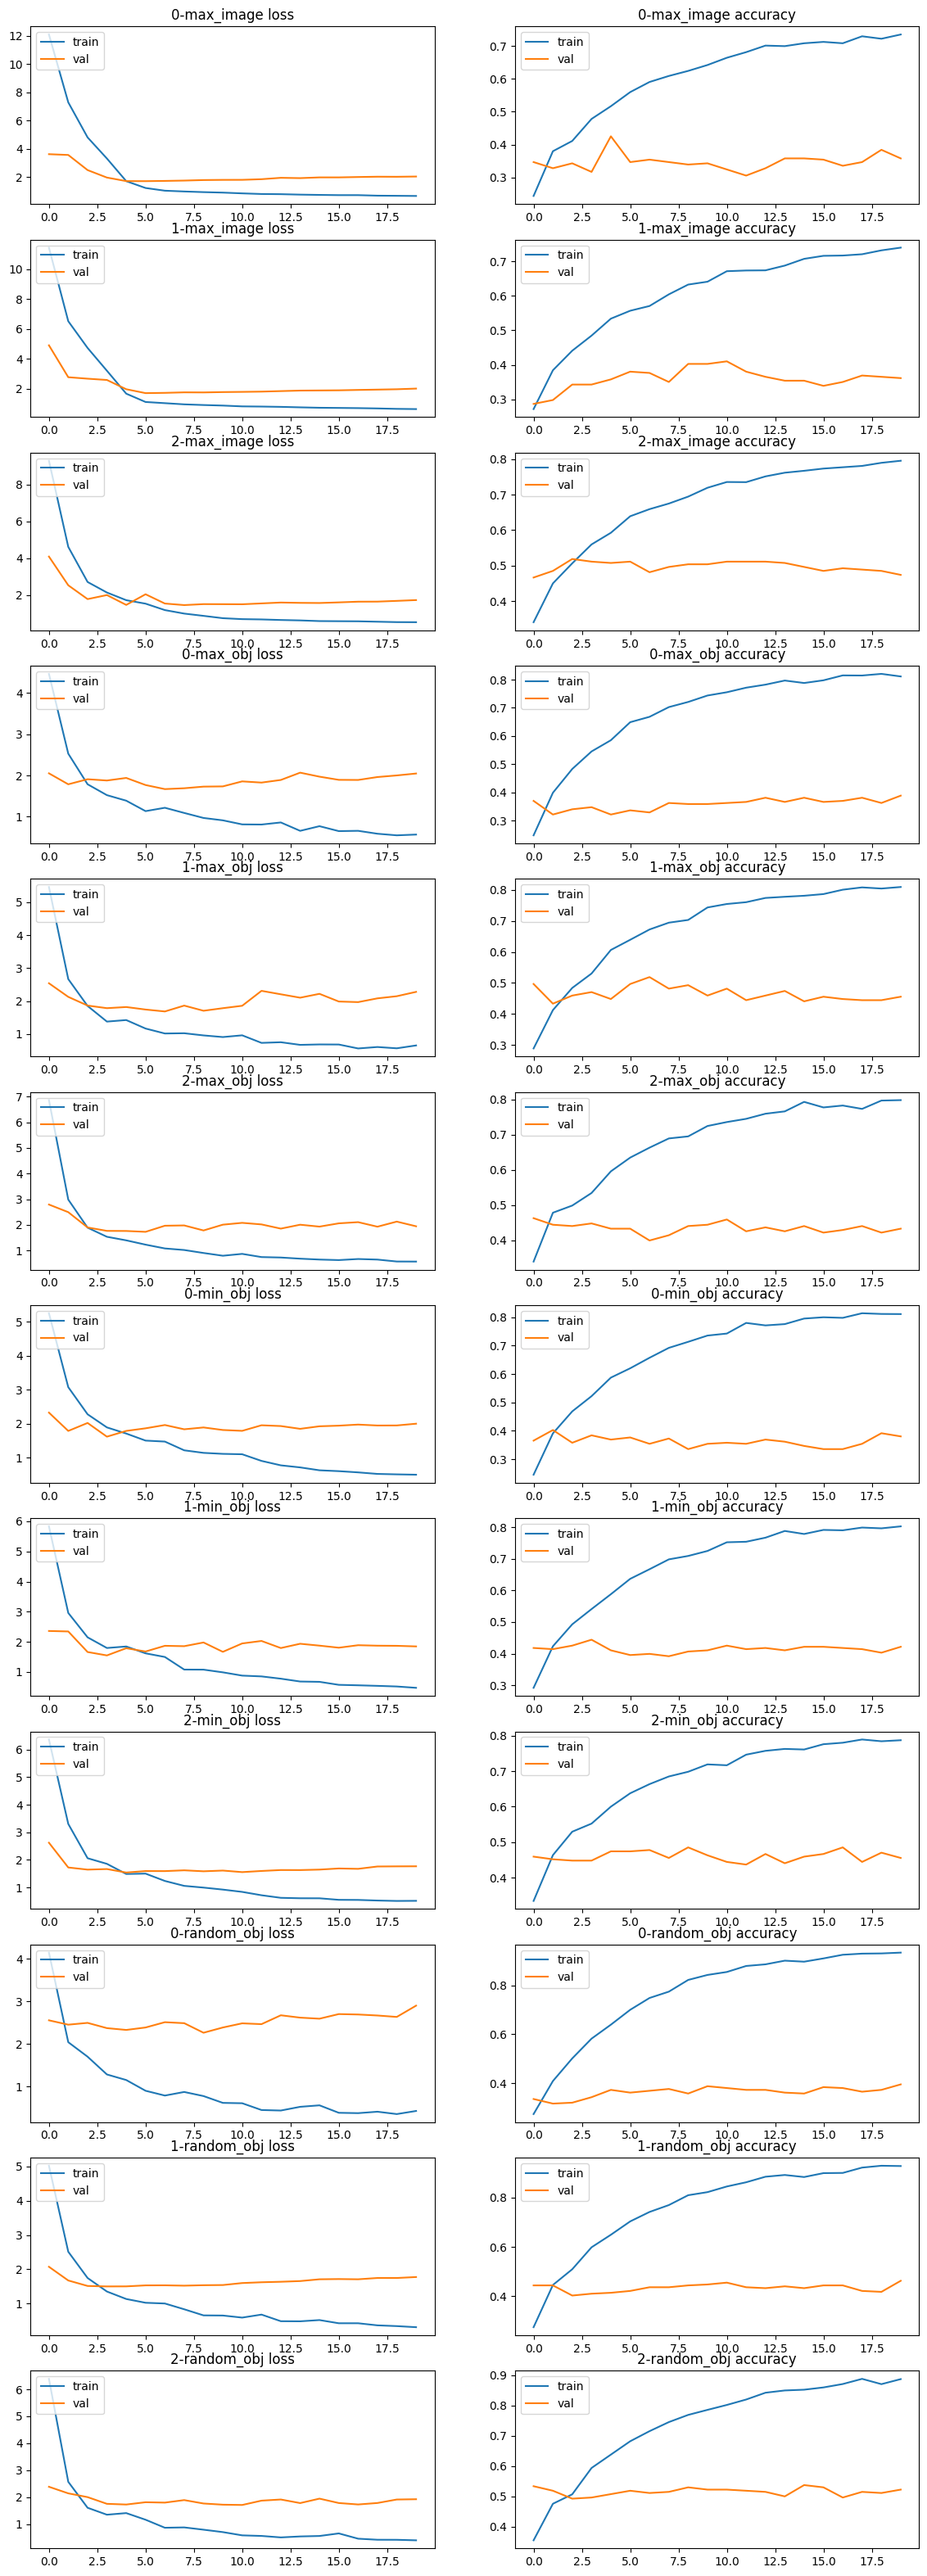

In [64]:
fig, axs = plt.subplots(nrows=12, ncols=2, figsize=(14, 40))
for idx, (layer_name, hist) in enumerate(histories.items()):
    axs[idx, 0].plot(hist.history['loss'])
    axs[idx, 0].plot(hist.history['val_loss'])
    axs[idx, 0].set_title(f'{layer_name} loss')
#     axs[idx, 0].ylabel('loss')
#     axs[idx, 0].xlabel('epoch')
    axs[idx, 0].legend(['train', 'val'], loc='upper left')

    axs[idx, 1].plot(hist.history['accuracy'])
    axs[idx, 1].plot(hist.history['val_accuracy'])
    axs[idx, 1].set_title(f'{layer_name} accuracy')
#     axs[idx, 1].ylabel('accuracy')
#     axs[idx, 1].xlabel('epoch')
    axs[idx, 1].legend(['train', 'val'], loc='upper left')

plt.show()

In [73]:
test_scores

{'0-main-consistent': [2.1761956214904785, 0.3333333432674408],
 '1-main-consistent': [2.12437105178833, 0.3737373650074005],
 '2-main-consistent': [1.975760817527771, 0.4680134654045105],
 '0-main-max_image': [2.1935791969299316, 0.3400673270225525],
 '1-main-max_image': [1.9889370203018188, 0.3973063826560974],
 '2-main-max_image': [1.7879207134246826, 0.4848484992980957],
 '0-main-max_obj': [2.1659202575683594, 0.36026936769485474],
 '1-main-max_obj': [2.1598949432373047, 0.3905723989009857],
 '2-main-max_obj': [1.9010003805160522, 0.42424243688583374],
 '0-main-min_obj': [2.162294626235962, 0.31313130259513855],
 '1-main-min_obj': [1.9635926485061646, 0.4040403962135315],
 '2-main-min_obj': [1.9843233823776245, 0.4680134654045105],
 '0-main-random_obj': [1.8904669284820557, 0.41750842332839966],
 '1-main-random_obj': [1.893489122390747, 0.4612794518470764],
 '2-main-random_obj': [2.1056323051452637, 0.4747474789619446],
 '0-second-consistent': [1.4414712190628052, 0.575757563114166

In [ ]:
 '9-main-consistent': [2.1761956214904785, 0.3333333432674408],
 '10-main-consistent': [2.12437105178833, 0.3737373650074005],
 '11-main-consistent': [1.975760817527771, 0.4680134654045105],
    
 '9-main-max_image': [2.1935791969299316, 0.3400673270225525],
 '10-main-max_image': [1.9889370203018188, 0.3973063826560974],
 '11-main-max_image': [1.7879207134246826, 0.4848484992980957],
    
 '0-main-max_obj': [2.1659202575683594, 0.36026936769485474],
 '1-main-max_obj': [2.1598949432373047, 0.3905723989009857],
 '2-main-max_obj': [1.9010003805160522, 0.42424243688583374],
    
 '0-main-min_obj': [2.162294626235962, 0.31313130259513855],
 '1-main-min_obj': [1.9635926485061646, 0.4040403962135315],
 '2-main-min_obj': [1.9843233823776245, 0.4680134654045105],
    
 '0-main-random_obj': [1.8904669284820557, 0.41750842332839966],
 '1-main-random_obj': [1.893489122390747, 0.4612794518470764],
 '2-main-random_obj': [2.1056323051452637, 0.4747474789619446],

In [ ]:
 '0-second-consistent': [1.4414712190628052, 0.5757575631141663],
 '1-second-consistent': [1.4556233882904053, 0.6161616444587708],
 '2-second-consistent': [1.4718594551086426, 0.6228955984115601],
    
 '0-second-max_image': [2.0382368564605713, 0.3569023609161377],
 '1-second-max_image': [2.0082321166992188, 0.3905723989009857],
 '2-second-max_image': [1.7094147205352783, 0.5050504803657532],
    
 '0-second-max_obj': [1.3489269018173218, 0.6060606241226196],
 '1-second-max_obj': [1.471747636795044, 0.6565656661987305],
 '2-second-max_obj': [1.5076103210449219, 0.6161616444587708],
    
 '0-second-min_obj': [1.4273850917816162, 0.5993266105651855],
 '1-second-min_obj': [1.4381524324417114, 0.6094276309013367],
 '2-second-min_obj': [1.390196442604065, 0.6363636255264282],
    
 '0-second-random_obj': [1.428950548171997, 0.6228955984115601],
 '1-second-random_obj': [1.575146198272705, 0.6531986594200134],
 '2-second-random_obj': [1.6093580722808838, 0.6262626051902771]}